In [3]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target)= \
  keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


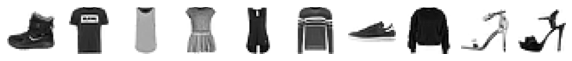

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [8]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


## SGDClassifer

In [10]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28) # 1차원으로 reshape 하기

In [11]:
print(train_scaled.shape)

(60000, 784)


In [13]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=1)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.8195666666666668


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(\
train_scaled,train_target, test_size=0.2, random_state=42
    )

In [19]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [21]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [25]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [28]:
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4316 - accuracy: 0.8567
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4274 - accuracy: 0.8594
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4241 - accuracy: 0.8592
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4212 - accuracy: 0.8606
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8620
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4174 - accuracy: 0.8624
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4173 - accuracy: 0.8639
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4149 - accuracy: 0.8646
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4153 - accuracy: 0.8641
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.413

In [29]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8547


[0.4465186297893524, 0.8547499775886536]

## 2개의 층

In [31]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [32]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28) # 1차원으로 reshape 하기

train_scaled, val_scaled, train_target, val_target = train_test_split(\
train_scaled,train_target, test_size=0.2, random_state=42)

In [33]:
dense1 = keras.layers.Dense(100, activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

model = keras.Sequential([dense1, dense2])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5647 - accuracy: 0.8071
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4069 - accuracy: 0.8538
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.8661
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3494 - accuracy: 0.8738
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3312 - accuracy: 0.8806


In [44]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [48]:
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # 1차원으로 reshape 하기

train_scaled, val_scaled, train_target, val_target = train_test_split(\
train_scaled,train_target, test_size=0.2, random_state=42)

In [49]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5359 - accuracy: 0.8102
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3931 - accuracy: 0.8572
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3572 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3201 - accuracy: 0.8861


In [50]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8704


[0.39795514941215515, 0.8704166412353516]

## 옵티마이저 사용

In [51]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5228 - accuracy: 0.8174
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3918 - accuracy: 0.8603
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3497 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3275 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3074 - accuracy: 0.8884


## 신경망 모델 훈련

In [54]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [55]:
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # 1차원으로 reshape 하기

train_scaled, val_scaled, train_target, val_target = train_test_split(\
train_scaled,train_target, test_size=0.2, random_state=42)

In [57]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [58]:
model = model_fn()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [60]:
# history 값 확인

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
# 손실값

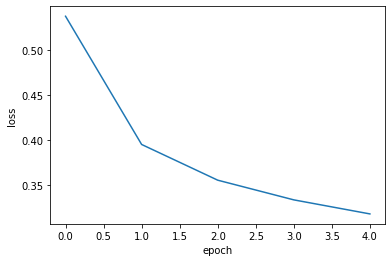

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

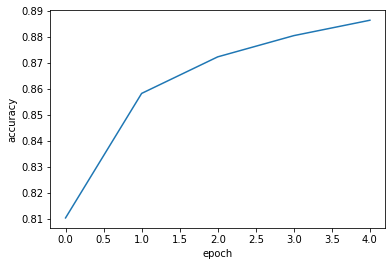

In [62]:
# 정확도

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [63]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))

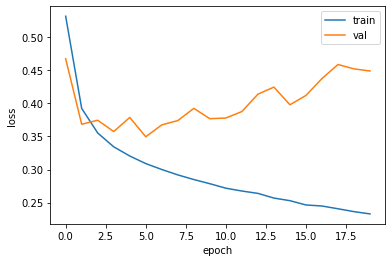

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

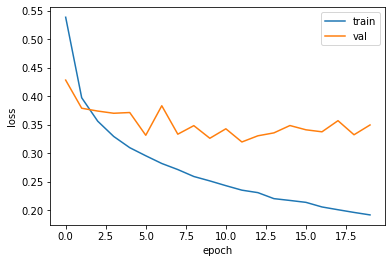

In [66]:
# adam 옵티마이저로 수정

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,\
                    validation_data=(val_scaled, val_target))



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [67]:
# 드롭아웃 (dropout)

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


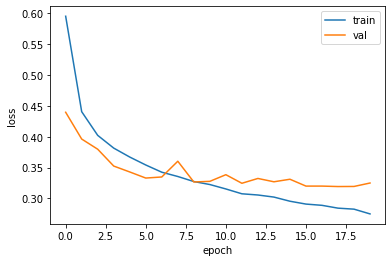

In [68]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,\
                    validation_data=(val_scaled, val_target))



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

과대적합이 확실히 줄었다.

하지만 다소 과대적합 되어있다. 에포크 횟수를 10으로 조정하고 다시 학습

In [69]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target, epochs=10, verbose=0, validation_data=(val_scaled,val_target))

In [70]:
# 훈련된 모델 저장

model.save_weights('model-weights.h5')
model.save('model.whole.h5')

In [72]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Dec 16 08:08 model-weights.h5
-rw-r--r-- 1 root root 982664 Dec 16 08:08 model.whole.h5


In [73]:
# 잘 작동하는지 실험
# 1
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

0.8811666666666667


In [75]:
# 2 

model = keras.models.load_model('model.whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8812


[0.32904407382011414, 0.8811666369438171]

In [ ]:
# 콜백
훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들이다

In [79]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [80]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3142 - accuracy: 0.8879


[0.3141520321369171, 0.8879166841506958]

In [81]:
# 조기종료 설정


model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# model.fit(train_scaled, train_target, epochs=20, verbose=0,validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [82]:
# 몇 에포크가 최상이였는지 출력하기

print(early_stopping_cb.stopped_epoch)

10


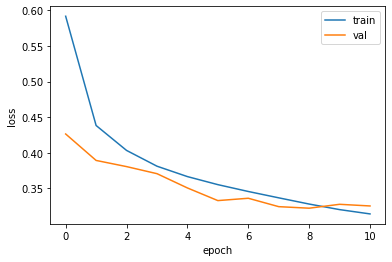

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()